# Assignment

Link for Datasets
(https://drive.google.com/drive/folders/105ftuIwN9kqyPNEEm3E6IM7LqywjyvJa?usp=sharing)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm

%matplotlib inline

Q21. Write a pandas program to import three datasheets from a given
excel data (coalpublic2013.xlsx ) in to a single dataframe.
 
Note: Structure of three datasheets are same.

In [386]:
path = "E:/BackupFromDadasLaptop/AGP/Personal/CTCs/ML/iNueron_Courses/DL_AL_00111D/Assignments/coalpublic2013.xlsx"
path = "E:/BackupFromDadasLaptop/AGP/Personal/CTCs/ML/iNueron_Courses/DL_AL_00111D/Assignments/employee.xlsx"

emp_df = pd.DataFrame()

for spreadsheet in pd.ExcelFile(path).sheet_names:
    sheet_df = pd.read_excel(path, sheet_name=spreadsheet)
    print(f"Sheet: {spreadsheet} has Rows: {sheet_df.shape[0]}, & Columns: {sheet_df.shape[1]}")
    emp_df = pd.concat([emp_df, sheet_df], ignore_index=True)

emp_df


Sheet: Sheet1 has Rows: 20, & Columns: 4
Sheet: Sheet2 has Rows: 19, & Columns: 4
Sheet: Sheet3 has Rows: 9, & Columns: 4


,emp_id,first_name,last_name,hire_date
0,100,Steven,King,2003-06-17
1,101,Neena,Kochhar,2005-09-21
2,102,Lex,De Haan,2001-01-13
3,103,Alexander,Hunold,2006-01-03
4,104,Bruce,Ernst,2007-05-21
5,105,David,Austin,2005-06-25
6,106,Valli,Pataballa,2006-02-05
7,107,Diana,Lorentz,2007-02-07
8,108,Nancy,Greenberg,2002-08-17
9,109,Daniel,Faviet,2002-08-16


Q 22. Write a pandas program to import three datasheets from a given
excel data (employee.xlsx ) into a single data frame and export the
result into new Excel file.
 
Note: Structure of three datasheets are same.

In [400]:
path = "E:/BackupFromDadasLaptop/AGP/Personal/CTCs/ML/iNueron_Courses/DL_AL_00111D/Assignments/employee.xlsx"

emp_df = pd.DataFrame()

spreadsheet_names = pd.ExcelFile(path).sheet_names

for sheet_name in spreadsheet_names:
    sheet_df = pd.read_excel(path, sheet_name=sheet_name)
    print(f"Excelbook's sheet='{sheet_name}' has rows={sheet_df.shape[0]} & columns={sheet_df.shape[1]}")
    emp_df = emp_df.append(sheet_df)

dest_path = "E:/BackupFromDadasLaptop/AGP/Personal/CTCs/ML/iNueron_Courses/DL_AL_00111D/Assignments/"
dest_file = "all_emp.xlsx"
emp_df.to_excel(dest_file)

from os import path

print("\nNewly created Excel file '{}' is found: {} & it's size is: {} in bytes.".
          format(dest_file, path.exists(dest_path + dest_file), path.getsize(dest_file)))


Excelbook's sheet='Sheet1' has rows=20 & columns=4
Excelbook's sheet='Sheet2' has rows=19 & columns=4
Excelbook's sheet='Sheet3' has rows=9 & columns=4

Newly created Excel file 'all_emp.xlsx' is found: True & it's size is: 7345 in bytes.


Q23. Write a pandas program to create the Pivot table with multiple
indexes from the data set of the titanic.csv.

In [111]:
path = "E:/BackupFromDadasLaptop/AGP/Personal/CTCs/ML/iNueron_Courses/DL_AL_00111D/Assignments/titanic.csv"

orig_titanic_df = pd.read_csv(path)

orig_titanic_df.drop(columns=[col for col in orig_titanic_df.columns if col.startswith("Unnamed")], inplace=True)

titanic_df = orig_titanic_df.copy()

cat_columns = [col for col in titanic_df.columns if titanic_df[col].dtypes == 'O']

pd.pivot_table(titanic_df, index=['alive', 'sex', 'class'])
#OR
titanic_df.groupby(['alive', 'sex', 'class']).count().unstack()


survived              pclass                age               \
class           First Second Third  First Second Third First Second Third   
alive sex                                                                   
no    female        3      6    72      3      6    72     3      6    55   
      male         77     91   300     77     91   300    61     84   215   
yes   female       91     70    72     91     70    72    82     68    47   
      male         45     17    47     45     17    47    40     15    38   

             sibsp  ... adult_male  deck              embark_town         \
class        First  ...      Third First Second Third       First Second   
alive sex           ...                                                    
no    female     3  ...         72     3      1     2           3      6   
      male      77  ...        300    55      2     4          77     91   
yes   female    91  ...         72    78      9     4          89     70   
      male      45  ...         47    39      4     2          45     17   

                   alone               
class        Third First Second Third  
alive sex                              
no    female    72     3      6    72  
      male     300    77     91   300  
yes   female    72    91     70    72  
      male      47    45     17    47  

[4 rows x 36 columns]

Q24. Write a Pandas program to create the Pivot table and find survival
rate by gender?

In [23]:
pd.pivot_table(titanic_df, index=['sex'], values=["survived"])

,survived
sex,
female,0.742038
male,0.188908


Q25. Write a pandas program to make partition each of the passengers
into 4 categories based on their age.
 
Note: Age categories- (0, 10), (10, 30), (30, 60), (60, 80)

In [144]:
titanic_df = orig_titanic_df.copy()

#Replace missing age values with mean of age:
titanic_df.age.fillna(titanic_df.age.mean(), inplace=True)

titanic_df["age_group"] = "-"
for lo, hi in age_range_cats:
    age_range = f"{lo}_{hi}"
    titanic_df.loc[titanic_df.age.between(lo, hi), ["age_group"]] = age_range

pd.pivot_table(titanic_df, index=["age_group"])

titanic_df.set_index("age_group", inplace=True)
titanic_df.sort_index()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
age_group,,,,,,,,,,,,,,,
0_10,1,1,male,4.00,0,2,81.8583,S,First,child,False,A,Southampton,yes,False
0_10,1,3,male,1.00,1,2,20.5750,S,Third,child,False,NaN,Southampton,yes,False
0_10,0,3,female,9.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
0_10,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
0_10,0,3,male,4.00,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60_80,0,1,male,61.00,0,0,33.5000,S,First,man,True,B,Southampton,no,True
60_80,1,2,male,62.00,0,0,10.5000,S,Second,man,True,NaN,Southampton,yes,True
60_80,0,1,male,60.00,0,0,26.5500,S,First,man,True,NaN,Southampton,no,True


In [ ]:
import sqlite3
sqlite3.sqlite_version_info
conn = sqlite3.connect("mydb.db")
conn.execute("drop table if exists tab1")
conn.execute("create table tab1 (id int)")
conn.execute("insert into tab1 values (1)")
conn.execute("insert into tab1 values (2)")
conn.execute("insert into tab1 values (3)")
conn.execute("insert into tab1 values (4)")
conn.commit()
stmt = conn.execute("select * from tab1")
for row in stmt:
    print(row)

Q26. Write a pandas program to create the Pivot table and find survival
rate by the gender, age of the different categories of various
classes.

In [137]:
titanic_df = orig_titanic_df.copy()

#Replace missing age values with mean of age:
titanic_df.age.fillna(titanic_df.age.mean(), inplace=True)

titanic_df["age_group"] = "-"
for lo, hi in age_range_cats:
    age_range = f"{lo}_{hi}"
    titanic_df.loc[titanic_df.age.between(lo, hi), ["age_group"]] = age_range

(titanic_df.groupby(["sex", "age_group"]).survived.mean()).unstack()

age_group,0_10,10_30,30_60,60_80
sex,,,,
female,0.633333,0.717647,0.800000,1.000000
male,0.593750,0.145897,0.201031,0.136364


In [138]:
pd.pivot_table(titanic_df, index=["sex", "age_group"], values="survived").unstack()

survived                              
age_group      0_10     10_30     30_60     60_80
sex                                              
female     0.633333  0.717647  0.800000  1.000000
male       0.593750  0.145897  0.201031  0.136364

In [139]:
pd.pivot_table(titanic_df, index=["sex", "age_group"], values="survived")

survived
sex    age_group          
female 0_10       0.633333
       10_30      0.717647
       30_60      0.800000
       60_80      1.000000
male   0_10       0.593750
       10_30      0.145897
       30_60      0.201031
       60_80      0.136364

Q27. Write a pandas program to create the Pivot table and calculate
number of women and men were in a particular cabin class.

In [142]:
titanic_df.groupby(["sex", "class"]).age.count().unstack()

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [141]:
pd.pivot_table(titanic_df, index=["sex", "class"], values="age", aggfunc="count") \
                .rename(columns={"age":"Passanger Count"})

Passanger Count
sex    class                  
female First                94
       Second               76
       Third               144
male   First               122
       Second              108
       Third               347

Q28. Write a pandas program to create the Pivot table and separate
the gender according to whether they travelled alone or not to get
the probability of survival


In [151]:
titanic_df = orig_titanic_df.copy()

#Replace missing age values with mean of age:
titanic_df.age.fillna(titanic_df.age.mean(), inplace=True)

titanic_df.groupby(["alone", "sex"]).survived.agg(["count"]).unstack()

count     
sex   female male
alone            
False    188  166
True     126  411

In [204]:
titanic_df = orig_titanic_df.copy()

#Replace missing age values with mean of age:
titanic_df.age.fillna(titanic_df.age.mean(), inplace=True)

pivote_table = pd.pivot_table(titanic_df, index=["alone", "sex"], values="survived", aggfunc="mean").unstack()
pivote_table


survived          
sex      female      male
alone                    
False  0.712766  0.271084
True   0.785714  0.155718

In [205]:
titanic_df.groupby(["alone", "sex"]).survived.mean().unstack()

sex,female,male
alone,,
False,0.712766,0.271084
True,0.785714,0.155718


Q29. Write a pandas program to create the Pivot table and find the
probability of survival by class, gender, solo boarding, and the port
of embarkation.

In [206]:
titanic_df.groupby(["class", "sex", "alone", "embark_town"]).survived.mean().unstack()

embark_town          Cherbourg  Queenstown  Southampton
class  sex    alone                                    
First  female False   1.000000    1.000000     0.941176
              True    0.944444         NaN     1.000000
       male   False   0.473684    0.000000     0.407407
              True    0.347826         NaN     0.326923
Second female False   1.000000         NaN     0.923077
              True    1.000000    1.000000     0.892857
       male   False   0.166667         NaN     0.300000
              True    0.250000    0.000000     0.089552
Third  female False   0.611111    0.625000     0.327586
              True    0.800000    0.760000     0.466667
       male   False   0.500000    0.100000     0.142857
              True    0.151515    0.068966     0.123762

Q30. Write a pandas program to get current date, oldest date and
number of days between Current date and the oldest date of Ufo
dataset.

In [403]:
from datetime import datetime

#datetime.datetime.now() - datetime.datetime("2020-02-01")
dt_today = datetime.now().date()
dt_oldest_day = datetime.strptime("1000-01-01", "%Y-%m-%d").date()
diff_in_days =  (dt_today - dt_oldest_day).days
print(f"Difference between dates {dt_oldest_day} & today(i.e. {dt_today}) is {diff_in_days} days.")

Difference between dates 1000-01-01 & today(i.e. 2020-02-21) is 372598 days.


Q31. Write a pandas program to get all sighting days of the
unidentified flying object (ufo) between 1950-10-10 and 1960-10-
10.

In [243]:
url = "http://bit.ly/uforeports"

orig_ufo_df = pd.read_csv(url)

In [271]:
ufo_df = orig_ufo_df.copy()

ufo_df["Time"] = ufo_df.Time.astype("datetime64")
ufo_df.rename(columns={"Time" : "DateTime"}, inplace=True)


dt_1950 = datetime.strptime("1950-10-10", "%Y-%m-%d").date()
dt_1960 = datetime.strptime("1960-10-10", "%Y-%m-%d").date()

ufo_df[ufo_df.DateTime.dt.date.between(dt_1950, dt_1960)]


,City,Colors Reported,Shape Reported,State,DateTime
147,Sandy Hook,NaN,TRIANGLE,NJ,1950-10-15 15:00:00
148,Half Moon Bay,NaN,OTHER,CA,1950-12-12 22:00:00
149,Palm Springs,NaN,CIGAR,CA,1951-01-20 04:30:00
150,Thompsonville,NaN,DISK,CT,1951-02-03 22:00:00
151,Los Angeles,NaN,DISK,CA,1951-02-15 11:00:00
...,...,...,...,...,...
638,Wichita,NaN,OVAL,KS,1960-09-10 10:00:00
639,Kingsport,ORANGE,CIRCLE,TN,1960-09-15 19:00:00
640,Seattle,NaN,DISK,WA,1960-09-15 20:30:00
641,Susanville,NaN,NaN,CA,1960-09-15 21:00:00


Q32. Write a Pandas program to extract the year, month, day, hour,
minute, second, and weekday from unidentified flying object (UFO)
reporting date.

In [276]:
temp_ufo_df = pd.DataFrame()
temp_ufo_df["DateTime"] = ufo_df.DateTime
temp_ufo_df["year"] = ufo_df.DateTime.dt.year
temp_ufo_df["month"] = ufo_df.DateTime.dt.month
temp_ufo_df["day"] = ufo_df.DateTime.dt.day
temp_ufo_df["hour"] = ufo_df.DateTime.dt.hour
temp_ufo_df["minute"] = ufo_df.DateTime.dt.minute
temp_ufo_df["second"] = ufo_df.DateTime.dt.second
temp_ufo_df["weekday"] = ufo_df.DateTime.dt.weekday
temp_ufo_df

,DateTime,year,month,day,hour,minute,second,weekday
0,1930-06-01 22:00:00,1930,6,1,22,0,0,6
1,1930-06-30 20:00:00,1930,6,30,20,0,0,0
2,1931-02-15 14:00:00,1931,2,15,14,0,0,6
3,1931-06-01 13:00:00,1931,6,1,13,0,0,0
4,1933-04-18 19:00:00,1933,4,18,19,0,0,1
...,...,...,...,...,...,...,...,...
18236,2000-12-31 23:00:00,2000,12,31,23,0,0,6
18237,2000-12-31 23:00:00,2000,12,31,23,0,0,6
18238,2000-12-31 23:45:00,2000,12,31,23,45,0,6
18239,2000-12-31 23:45:00,2000,12,31,23,45,0,6


Q33. Write a pandas program to count year-country wise frequency of
reporting dates of the unidentified flying object(UFO).


In [341]:
ufo_df.groupby([ufo_df.DateTime.dt.year, ufo_df.State]).DateTime.count()

#OR

pivot_df = pd.pivot_table(ufo_df, index=[ufo_df.DateTime.dt.year, ufo_df.State], values=["DateTime"], aggfunc="count")
pivot_df.rename(columns={"DateTime" : "UFO Seen Frequency"}, inplace=True)
pivot_df

UFO Seen Frequency
DateTime State                    
1930     NJ                      1
         NY                      1
1931     CO                      1
         KS                      1
1933     NY                      1
...                            ...
2000     VT                      7
         WA                    201
         WI                     50
         WV                     13
         WY                      7

[2062 rows x 1 columns]

Q34. Write a pandas program to get the difference (in days) between
documented date and reporting date of unidentified flying object
(UFO).

In [433]:
orig_ufo = pd.read_csv(r"E:\BackupFromDadasLaptop\AGP\Personal\CTCs\ML\iNueron_Courses\DL_AL_00111D\Assignments\ufo-sightings\scrubbed.csv")

ufo = orig_ufo.copy()

ufo["date_seen"] = ufo.datetime.str.split()[:][0][0]
ufo.date_seen = ufo.date_seen.astype("datetime64")

ufo.rename(columns={"date posted":"date_posted"}, inplace=True)
ufo.date_posted = ufo.date_posted.astype("datetime64")

dates_ufo = pd.concat([ufo["date_seen"], ufo["date_posted"]], axis=1)

dates_ufo["date_dff"] = abs((ufo["date_seen"] - ufo["date_posted"]).dt.days)
dates_ufo

,date_seen,date_posted,date_dff
0,1949-10-10,2004-04-27,19923
1,1949-10-10,2005-12-16,20521
2,1949-10-10,2008-01-21,21287
3,1949-10-10,2004-01-17,19822
4,1949-10-10,2004-01-22,19827
...,...,...,...
80327,1949-10-10,2013-09-30,23366
80328,1949-10-10,2013-09-30,23366
80329,1949-10-10,2013-09-30,23366
80330,1949-10-10,2013-09-30,23366


Q35. Write a pandas program to generate sequences of fixedfrequency dates and time spans.

In [361]:
dt_df = pd.date_range("2020-01-01", periods=24, freq="H")
print("#Frequency, Hour-wise:")
print(dt_df)
print("-" * 100)

dt_df = pd.date_range("2020-01-01", periods=10, freq="min")
print("\n#Frequency, Minute-wise:")
print(dt_df)
print("-" * 100)

dt_df = pd.date_range('2020-01-01', periods=15, freq="S")
print("\n#Frequency second-wise:")
print(dt_df)
print("-" * 100)

dt_df = pd.date_range("2020-01-01", periods=5) #default frequency day-wise i.e. "D"
print("\n#Frequency day-wise:")
print(dt_df)
print("-" * 100)

dt_df = pd.date_range("2020-01-01", periods=5, freq="M")
print("\n#Frequency month-wise:")
print(dt_df)
print("-" * 100)

dt_df = pd.date_range("2020-01-01", periods=3, freq="A-JAN")
print("\n#Frequency month-wise:")
print(dt_df)
print("-" * 100)


#Frequency, Hour-wise:
DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               '2020-01-01 10:00:00', '2020-01-01 11:00:00',
               '2020-01-01 12:00:00', '2020-01-01 13:00:00',
               '2020-01-01 14:00:00', '2020-01-01 15:00:00',
               '2020-01-01 16:00:00', '2020-01-01 17:00:00',
               '2020-01-01 18:00:00', '2020-01-01 19:00:00',
               '2020-01-01 20:00:00', '2020-01-01 21:00:00',
               '2020-01-01 22:00:00', '2020-01-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')
----------------------------------------------------------------------------------------------------

#Frequency, Minute-wise:
DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:01:00',
        

Q36. Write a pandas program to manipulate and convert date times
with timezone information.

In [437]:
dt_df = pd.date_range('2020-01-01', periods=3, freq='H')
dt_df = dt_df.tz_localize('UTC') + pd.Timedelta('05:30:00')
print("\n#Dates in IST timezone:")
print(dt_df)
print("-" * 70)

print("\n#Dates convrted from IST timzone to EST timezone:")
dt_df = dt_df.tz_convert('America/Los_Angeles')
print(dt_df)
print("-" * 70)



#Dates in IST timezone:
DatetimeIndex(['2020-01-01 05:30:00+00:00', '2020-01-01 06:30:00+00:00',
               '2020-01-01 07:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')
----------------------------------------------------------------------

#Dates convrted from IST timzone to EST timezone:
DatetimeIndex(['2019-12-31 21:30:00-08:00', '2019-12-31 22:30:00-08:00',
               '2019-12-31 23:30:00-08:00'],
              dtype='datetime64[ns, America/Los_Angeles]', freq='H')
----------------------------------------------------------------------


Q37. Write a pandas program to create the graphical analysis of UFO
(unidentified flying object) Sightings year.

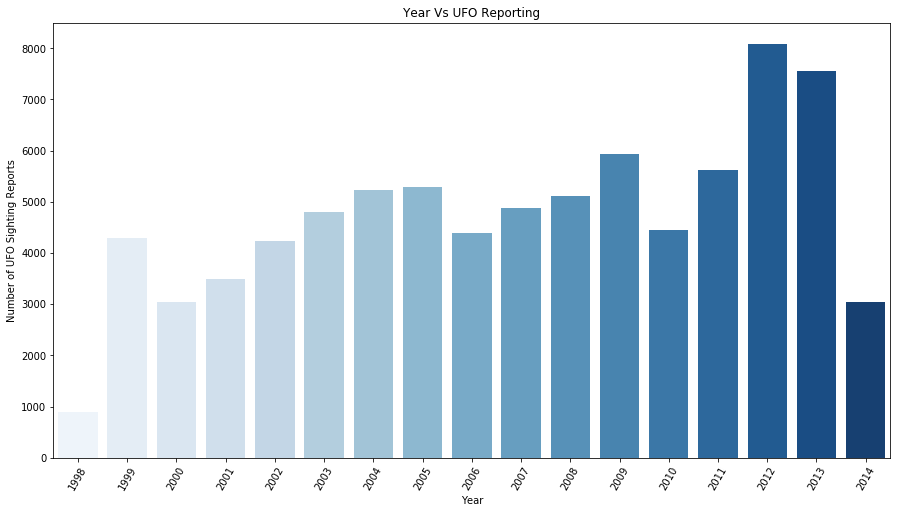

In [16]:
orig_ufo = pd.read_csv(r"E:\BackupFromDadasLaptop\AGP\Personal\CTCs\ML\iNueron_Courses\DL_AL_00111D\Assignments\ufo-sightings\scrubbed.csv")
ufo = orig_ufo.copy()

ufo["date_reported"] = pd.to_datetime(ufo["date posted"])
ufo["year_reported"] = ufo["date_reported"].dt.year
yy = ufo["year_reported"].value_counts()
yr_index = yy.index
yr_values = yy.values

plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title("Year Vs UFO Reporting")
plt.xlabel("Year")
plt.ylabel("Number of UFO Sighting Reports")
years_plot = sns.barplot(x=yr_index[:60],y=yr_values[:60], palette = "Blues")


Q38. Write a pandas program to create a comparison of the top 10
years in which the (UFO) was sighted VS each Month.

In [324]:
temp_ufo_df.groupby([temp_ufo_df.year, temp_ufo_df.month]).DateTime.count().sort_values(ascending=False).head(64).unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1999,126.0,157.0,149.0,139.0,171.0,236.0,262.0,274.0,362.0,285.0,418.0,195.0
2000,198.0,178.0,202.0,171.0,154.0,233.0,322.0,250.0,257.0,278.0,200.0,192.0
1998,75.0,74.0,130.0,112.0,95.0,178.0,156.0,144.0,215.0,205.0,189.0,170.0
1997,NaN,NaN,174.0,86.0,93.0,170.0,199.0,99.0,NaN,105.0,113.0,NaN
1995,90.0,113.0,120.0,88.0,98.0,152.0,121.0,181.0,120.0,95.0,116.0,NaN
1996,NaN,NaN,NaN,91.0,74.0,117.0,NaN,NaN,NaN,NaN,78.0,75.0
1976,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN


Q39. Write a pandas program to create a heatmap (rectangular data as
a colour-encoded matrix) for comparison of top 10 years in
which (UFO ) was sighted VS each Month.

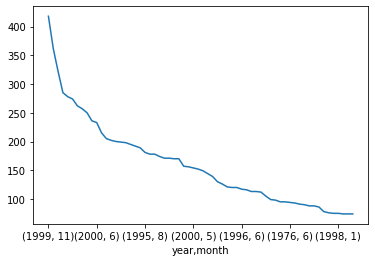

In [331]:
temp_ufo_df.groupby([temp_ufo_df.year, temp_ufo_df.month]).DateTime.count().sort_values(ascending=False).head(64).plot()

Q40. Write a pandas program to create a Timewheel of Hour VS Year
comparison of the top 10 years in which the (UFO) was sighted

## Great Job!